# PCA Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the processed data
data_path = '/Users/gunnradgeving/Documents/GitHub/ProjectInStatisticalEvaluationOfAI/grouped_country_data.csv'  # Update with the correct path to your processed data
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
df.head()

,country,text,answer,word_count,unique_word_count,token_count,avg_word_length,sentence_count,avg_sentence_length,sentiment_polarity,...,End date,Other Names,Earlier Name,Later Name,Geographic Term,Membership Document Symbol,academic,vocational,userConsiderations,background
0,Afghanistan,Uddannelsesmuligheder i Danmark\nI'm a 16 year...,\nThank you for sharing your background — that...,421.0,216.5,627.0,5.05,27.5,15.40,0.206530,...,NaN,"Islamic Republic of Afghanistan, Transitional ...",NaN,NaN,AFGHANISTAN,A/RES/34 (I),19.5,8.5,12.5,6.0
1,Albania,Uddannelsesmuligheder efter folkeskole\nI'm a ...,\nThank you for sharing a bit about yourself —...,434.0,218.0,617.5,5.05,29.5,14.75,0.216363,...,NaN,Republic of Albania,NaN,NaN,ALBANIA,A/RES/995 (X),22.0,10.0,15.5,7.0
2,Algeria,Uddannelsesmuligheder efter folkeskole\nI'm a ...,\nThank you for sharing a bit about yourself —...,468.0,233.0,658.5,4.90,28.5,16.40,0.179951,...,NaN,"People's Democratic Republic of Algeria, Al-Ja...",NaN,NaN,ALGERIA,A/RES/1754 (XVII),23.0,11.5,10.5,6.5
3,Andorra,Uddannelsesvalg efter folkeskolen\nI'm a 16 ye...,\nThank you for sharing a bit about yourself —...,457.5,222.5,667.0,5.00,31.5,14.80,0.203906,...,NaN,Principality of Andorra,NaN,NaN,ANDORRA,A/RES/47/232,23.0,9.5,15.5,6.5
4,Angola,Uddannelsesvalg efter folkeskole\nI'm a 16 yea...,\nThanks for sharing — you're in a very import...,405.0,208.0,586.0,4.95,30.0,14.00,0.200068,...,NaN,Republic of Angola,NaN,NaN,ANGOLA,A/RES/31/44,20.5,14.5,12.0,5.0


In [3]:
# Select only the features of interest
features = ['academic', 'vocational', 'userConsiderations', 'background']
x = df[features].values
x = StandardScaler().fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
final_df = pd.concat([principal_df, df[['country']]], axis=1)

# Display the principal components DataFrame
final_df.head()

,Principal Component 1,Principal Component 2,country
0,-1.159540,0.101025,Afghanistan
1,0.072620,1.229468,Albania
2,0.533823,-0.834639,Algeria
3,-0.022836,1.216920,Andorra
4,0.238855,-1.042667,Angola


In [4]:
# Load group info (income and region)
income_df = pd.read_csv('/Users/gunnradgeving/Documents/GitHub/ProjectInStatisticalEvaluationOfAI/income_un_members_only.csv', delimiter=';')
# Fix Venezuela label if needed
income_df.loc[income_df['Economy'] == 'Venezuela (Bolivarian Republic of)', 'Income group'] = 'Upper middle income'

# Merge with PCA DataFrame
final_df = final_df.merge(
    income_df[['Economy', 'Income group', 'Region']],
    left_on='country',
    right_on='Economy',
    how='left'
)

# Optional: Load and merge education group
education_df = pd.read_csv('/Users/gunnradgeving/Documents/GitHub/ProjectInStatisticalEvaluationOfAI/education_un_members_only.csv', delimiter=';')
education_df = education_df[education_df.columns[0]].str.split(',', expand=True)
education_df.columns = ['Economy', 'Year', 'Economy_Code', 'Educational_Attainment']
education_df["Educational_Attainment"] = pd.to_numeric(education_df["Educational_Attainment"], errors="coerce")
education_df.fillna(education_df["Educational_Attainment"].mean(), inplace=True)
education_df = education_df[['Economy', 'Educational_Attainment']]
final_df = final_df.merge(education_df, on='Economy', how='left')

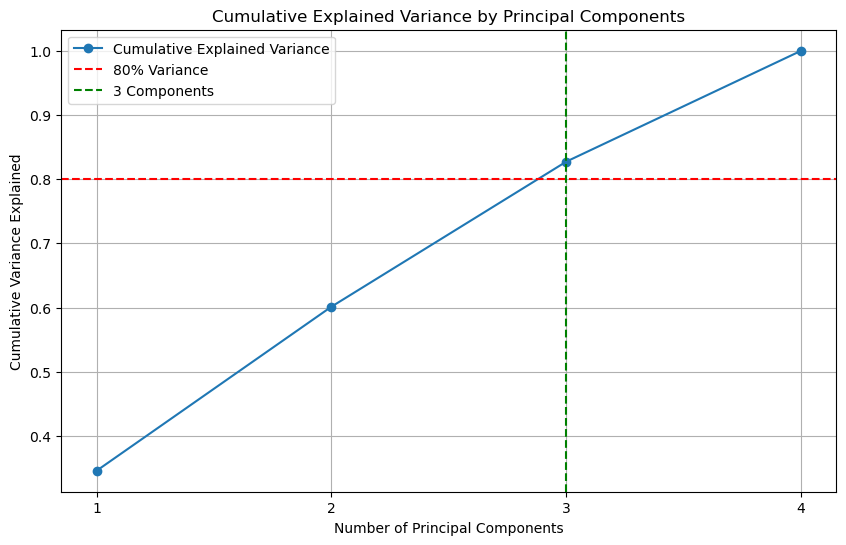

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Redo PCA with at least 10 components (or as many as features if fewer)
n_components = min(10, x.shape[1])
pca_full = PCA(n_components=n_components)
pca_full.fit(x)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Variance')

# Mark the number of components where 80% is reached
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
plt.axvline(x=n_components_80, color='g', linestyle='--', label=f'{n_components_80} Components')

plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, n_components + 1))
plt.legend()
plt.grid()
plt.show()

PCA Loadings (contribution of each feature to each principal component):


,PC1,PC2
academic,0.664279,0.067492
vocational,0.561349,-0.287440
userConsiderations,-0.022567,0.914031
background,0.493064,0.278155


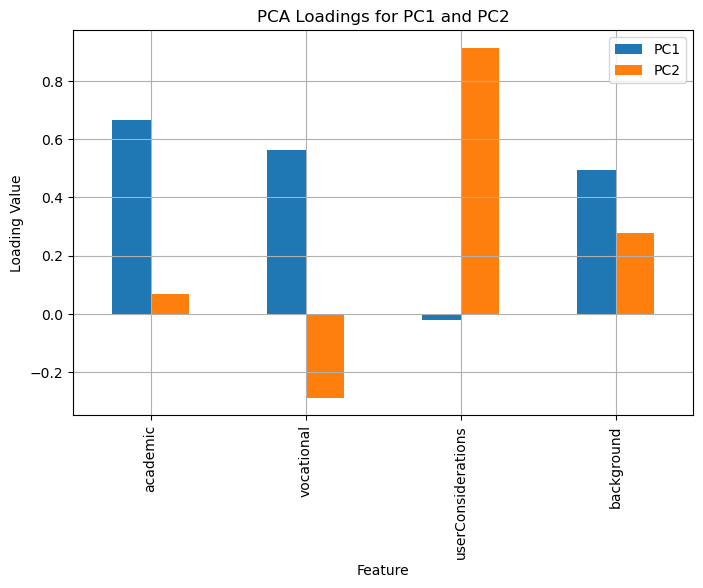

In [8]:
# Show PCA loadings for the first two principal components
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
print("PCA Loadings (contribution of each feature to each principal component):")
display(loadings)

# Bar plot of loadings for PC1 and PC2
loadings.plot(kind='bar', figsize=(8, 5))
plt.title('PCA Loadings for PC1 and PC2')
plt.ylabel('Loading Value')
plt.xlabel('Feature')
plt.grid()
plt.show()

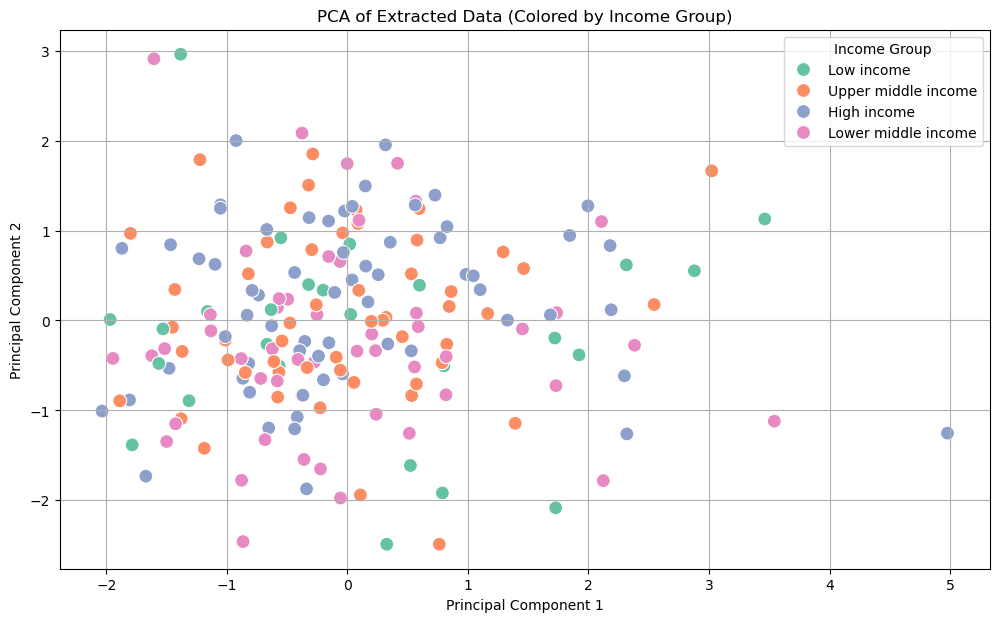

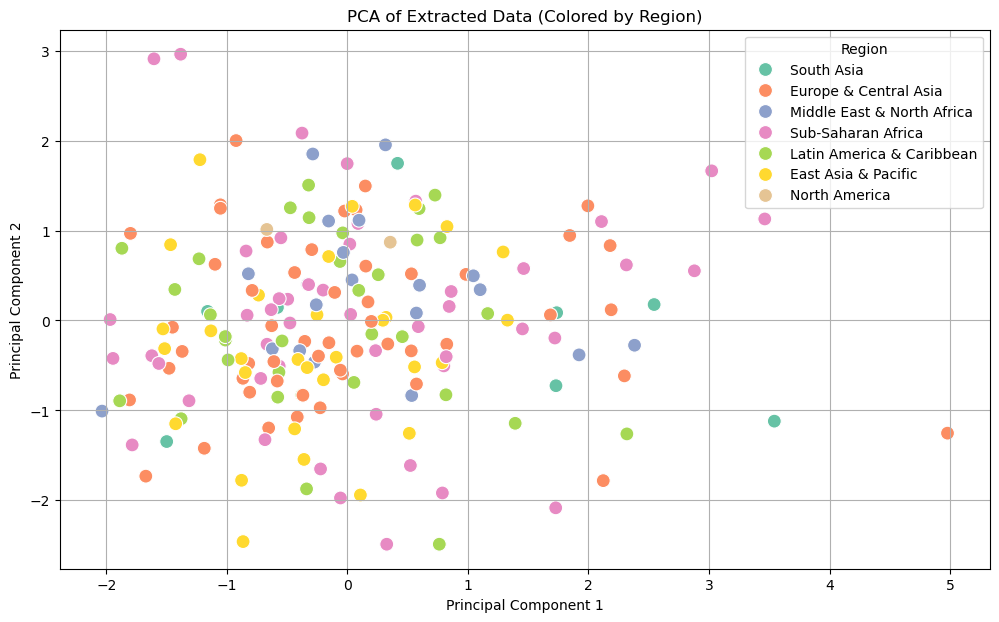

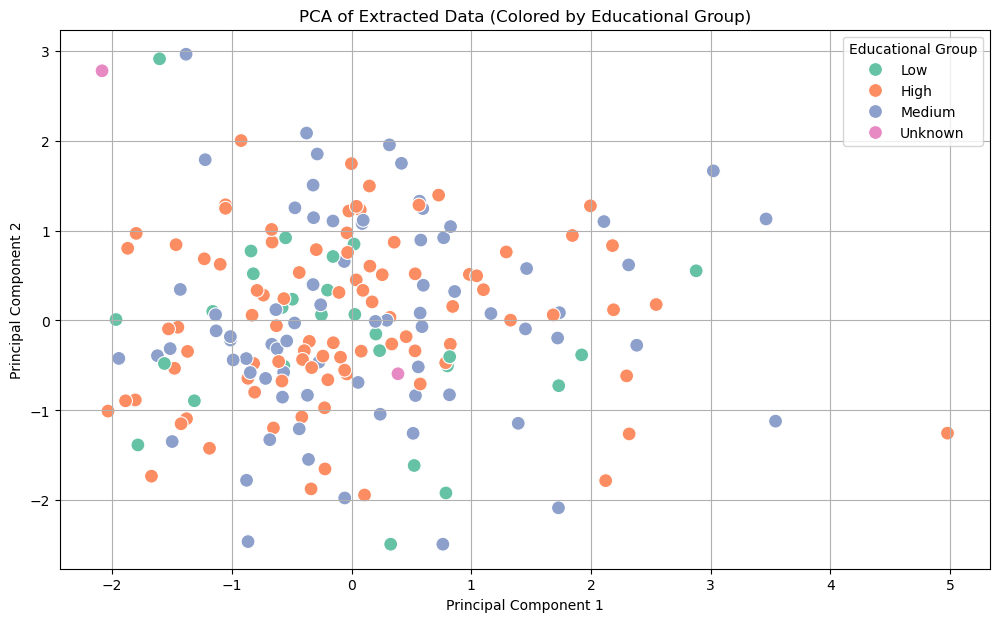

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Plot by Income group
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=final_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Income group',
    palette='Set2',
    s=100,
    alpha=1.0
)
plt.title('PCA of Extracted Data (Colored by Income Group)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Income Group')
plt.grid()
plt.show()

# 2. Plot by Region
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=final_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Region',
    palette='Set2',
    s=100,
    alpha=1.0
)
plt.title('PCA of Extracted Data (Colored by Region)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Region')
plt.grid()
plt.show()

# 3. Plot by Educational group (Low/Medium/High)
# First, create a categorical educational group
def edu_group(attainment):
    if pd.isnull(attainment):
        return 'Unknown'
    elif attainment < 50:
        return 'Low'
    elif attainment < 90:
        return 'Medium'
    else:
        return 'High'

final_df['Educational Group'] = final_df['Educational_Attainment'].apply(edu_group)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=final_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Educational Group',
    palette='Set2',
    s=100,
    alpha=1.0
)
plt.title('PCA of Extracted Data (Colored by Educational Group)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Educational Group')
plt.grid()
plt.show()

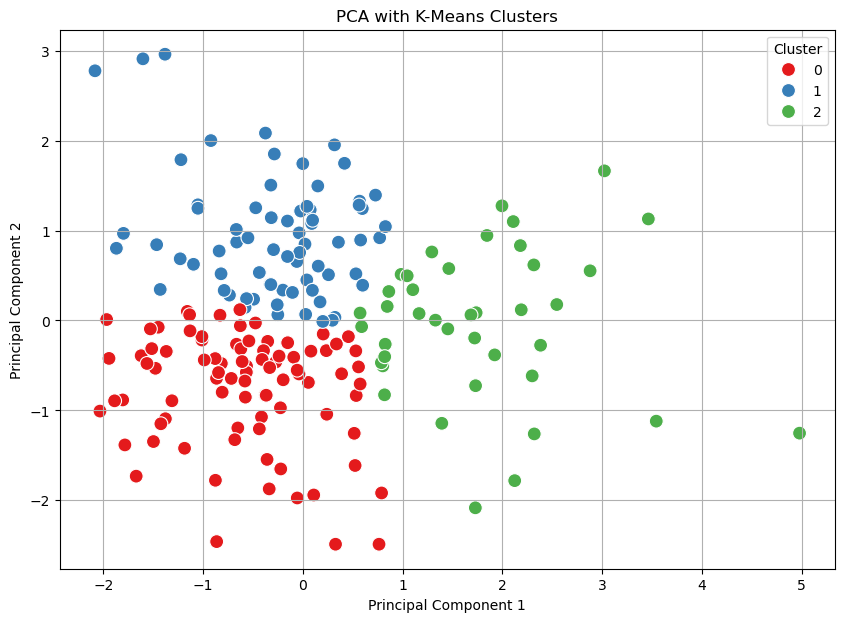

In [9]:
from sklearn.cluster import KMeans

# Use the first two principal components
X_pca = final_df[['Principal Component 1', 'Principal Component 2']].values

# Fit K-Means (choose k, e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(X_pca)

# Plot with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=final_df,
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',
    palette='Set1',
    s=100
)
plt.title('PCA with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [11]:
def print_cluster_pattern(crosstab, group_name):
    print(f"\nCluster vs. {group_name}:")
    display(crosstab)
    # Calculate and print purity for each cluster
    for cluster in crosstab.index:
        total = crosstab.loc[cluster].sum()
        dominant = crosstab.loc[cluster].max()
        dominant_group = crosstab.loc[cluster].idxmax()
        purity = dominant / total if total > 0 else 0
        print(f"  Cluster {cluster}: {dominant_group} is dominant ({dominant}/{total}, purity={purity:.2f})")
    print("-" * 50)

# 1. Income group
income_crosstab = pd.crosstab(final_df['Cluster'], final_df['Income group'])
print_cluster_pattern(income_crosstab, "Income group")

# 2. Region
region_crosstab = pd.crosstab(final_df['Cluster'], final_df['Region'])
print_cluster_pattern(region_crosstab, "Region")

# 3. Educational Group
edu_crosstab = pd.crosstab(final_df['Cluster'], final_df['Educational Group'])
print_cluster_pattern(edu_crosstab, "Educational Group")


Cluster vs. Income group:


Income group,High income,Low income,Lower middle income,Upper middle income
Cluster,,,,
0,23,12,25,24
1,28,7,14,20
2,12,7,11,10


  Cluster 0: Lower middle income is dominant (25/84, purity=0.30)
  Cluster 1: High income is dominant (28/69, purity=0.41)
  Cluster 2: High income is dominant (12/40, purity=0.30)
--------------------------------------------------

Cluster vs. Region:


Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Cluster,,,,,,,
0,17,25,15,5,0,2,20
1,10,17,14,10,2,2,14
2,3,10,4,5,0,4,14


  Cluster 0: Europe & Central Asia is dominant (25/84, purity=0.30)
  Cluster 1: Europe & Central Asia is dominant (17/69, purity=0.25)
  Cluster 2: Sub-Saharan Africa is dominant (14/40, purity=0.35)
--------------------------------------------------

Cluster vs. Educational Group:


Educational Group,High,Low,Medium,Unknown
Cluster,,,,
0,39,11,34,1
1,33,12,24,1
2,18,5,17,0


  Cluster 0: High is dominant (39/85, purity=0.46)
  Cluster 1: High is dominant (33/70, purity=0.47)
  Cluster 2: High is dominant (18/40, purity=0.45)
--------------------------------------------------
